# Airline Passenger Satisfaction 

This project explores a dataset of airline passengers to analyze and understand customer satisfaction based on various features such as flight service quality, passenger demographics, and travel details.

## Objective

The primary goal of this notebook is to perform a comprehensive Exploratory Data Analysis (EDA) on the dataset and uncover patterns or insights that might affect passenger satisfaction.

 ## In This Notebook:
- Load and explore the dataset
- Report descriptive statistics for numerical variables
- Identify and handle missing values
- Detect and visualize outliers
- Visualize key variables and relationships


In [42]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Statistical Summary ##

In this section, we analyze the central tendency and dispersion metrics of the dataset's numerical features. These include:

- **Central Tendency**: Mean, Median
- **Dispersion**: Standard Deviation, Minimum, Maximum, Quartiles

This summary provides a general overview of how the values are distributed and helps identify potential anomalies or skewed distributions.

In [39]:
import numpy as np

numerical_columns = df.select_dtypes(include=[np.number])

basic_stats = numerical_columns.describe().T  
basic_stats['median'] = numerical_columns.median()


basic_stats = basic_stats[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]

basic_stats


,mean,median,std,min,25%,50%,75%,max
Unnamed: 0,51951.500000,51951.5,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,64924.210502,64856.5,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,39.379706,40.0,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,1189.448375,843.0,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,2.729683,3.0,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,3.060296,3.0,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,2.756901,3.0,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,2.976883,3.0,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,3.202129,3.0,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,3.250375,3.0,1.349509,0.0,2.00,3.0,4.00,5.0


## Missing Value Analysis ##


Missing data can negatively impact data quality and model performance. Therefore, identifying and handling missing values is a crucial step in data preprocessing.

In this section, we:

- Detect missing values using `.isnull().sum()`
- Visualize missing data using a pie chart
- Discuss potential strategies for handling missing values:
  - Dropping rows or columns
  - Imputation (e.g., mean/median/mode filling)

In [43]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if not missing_values.empty:
    print("Columns with Missing Values:\n")
    print(missing_values)
else:
    print("There are no missing values in the data set..")



Columns with Missing Values:

Arrival Delay in Minutes    310
dtype: int64


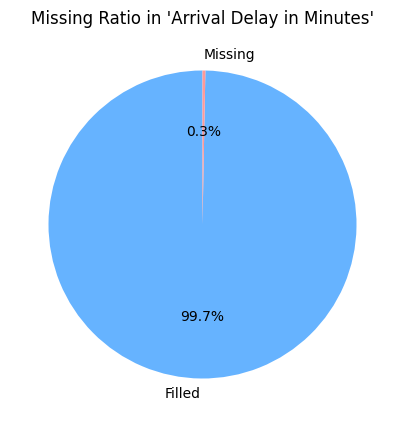


'Arrival Delay in Minutes' value status for column:
- Filled data count: 103594
- Number of missing data: 310


In [44]:
column = missing_values.index[0]
filled = df[column].notnull().sum()
missing = df[column].isnull().sum()

labels = ['Filled', 'Missing']
values = [filled, missing]

plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#ff9999"])
plt.title(f"Missing Ratio in '{column}'")
plt.show()


print(f"\n'{column}' value status for column:")
print(f"- Filled data count: {filled}")
print(f"- Number of missing data: {missing}")



## Filling Missing Values with Median

The column `Arrival Delay in Minutes` had 310 missing values.

To decide how to fill them, we first analyzed the distribution of the column:

- The **mean** was approximately **15.18**, but
- The **median** and **25th percentile** were both **0.0**,
- The **maximum** value reached **1584.0**, indicating the presence of extreme outliers (long delays).

These statistics show that the data is **right-skewed**, meaning that most flights had little or no delay, but a few had extremely high delays.

In such cases, **using the mean** can introduce bias by overestimating typical values due to the influence of outliers.

Therefore, we chose to **fill missing values with the median (0.0)** because:

- It represents the typical (most common) experience in the data,
- It is **robust to outliers**,
- It maintains the overall distribution without artificially inflating delay times.

This approach helps preserve the integrity of the data and ensures that the imputed values reflect realistic scenarios.


In [19]:
median_delay = df['Arrival Delay in Minutes'].median()


df['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)

df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Outlier Analysis

Outliers are values that significantly deviate from the rest of the data. They can distort statistical analyses and affect model performance if not handled appropriately.

### Why Analyze Outliers?

- To detect anomalies or data entry errors
- To decide whether to keep, transform, or remove them
- To ensure robust and accurate insights

In this section, we:
- Identify numerical features with potential outliers
- Use **boxplots** and the **IQR (Interquartile Range) method** to detect outliers



Columns with potential outliers:
- Flight Distance: 2291 outliers
- Checkin service: 12891 outliers
- Departure Delay in Minutes: 14529 outliers
- Arrival Delay in Minutes: 13954 outliers


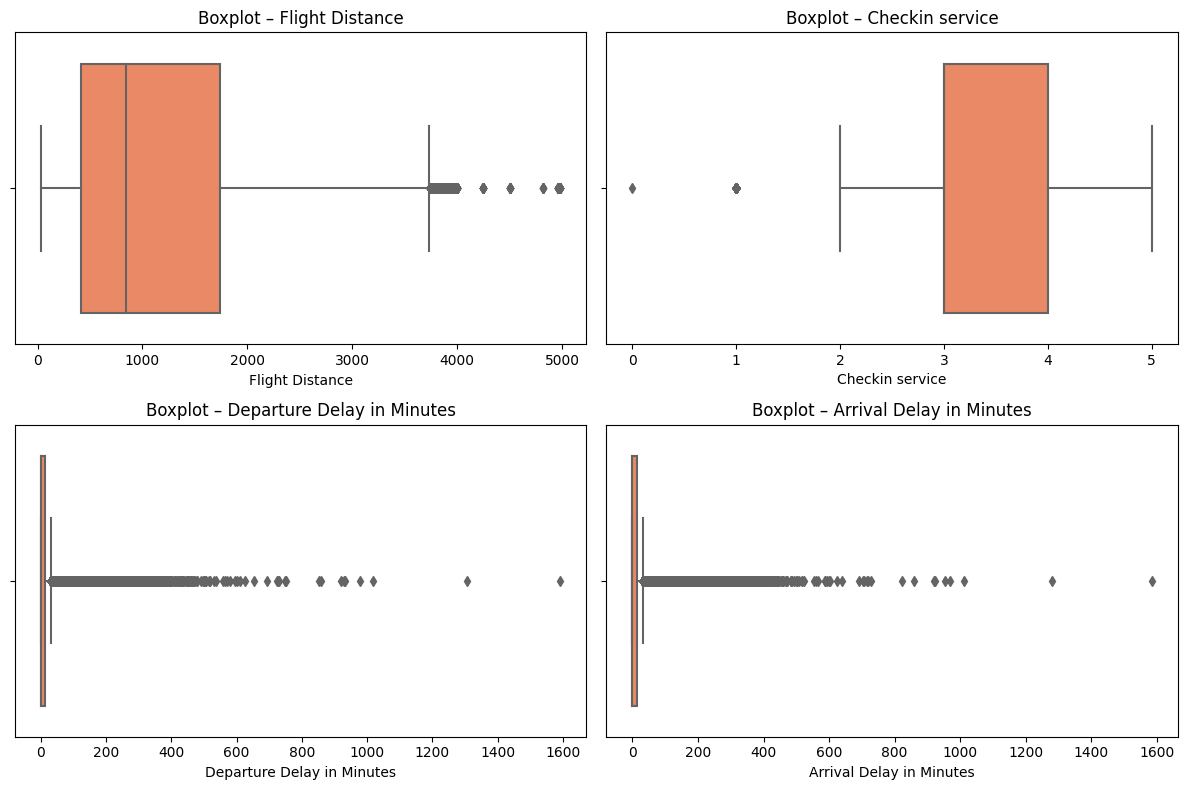

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


numeric_cols = df.select_dtypes(include=[np.number])

outlier_summary = {}

for col in numeric_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    if outlier_count > 0:
        outlier_summary[col] = outlier_count

print("Columns with potential outliers:")
for col, count in outlier_summary.items():
    print(f"- {col}: {count} outliers")


outlier_cols = list(outlier_summary.keys())
n = len(outlier_cols)
cols = 2
rows = math.ceil(n / cols)


fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

for i, col in enumerate(outlier_cols):
    r = i // cols
    c = i % cols
    ax = axes[r, c] if rows > 1 else axes[c]
    sns.boxplot(x=df[col], ax=ax, color='coral')
    ax.set_title(f"Boxplot – {col}")
    ax.set_xlabel(col)


total_plots = rows * cols
if total_plots > n:
    for j in range(n, total_plots):
        r = j // cols
        c = j % cols
        ax = axes[r, c] if rows > 1 else axes[c]
        ax.axis('off')

plt.tight_layout()
plt.show()




## Exploratory Data Visualization: Numerical Features

In this section, we conduct visual analysis of key numerical features to understand their distribution and relationships.

#### Histogram & KDE Plots:
We plotted histograms along with Kernel Density Estimates (KDE) for selected numerical variables:
- **Arrival Delay in Minutes**
- **Flight Distance**
- **Departure Delay in Minutes**

These plots help us observe:
- The **shape** of the distribution (e.g., skewness, modality),
- The **spread** and frequency of values,
- Whether data is **normally distributed** or skewed.

Such insights guide decisions on transformations (e.g., log scaling) or outlier treatment.

#### Correlation Heatmap:
We computed the **correlation matrix** for all numerical features and visualized it using a heatmap.

This reveals:
- Which features have **strong linear relationships** (positive or negative),
- Potential issues of **multicollinearity** in the data,
- Redundant features that may be dropped or combined during modeling.

Understanding these patterns is crucial before applying machine learning algorithms or statistical tests.


### Analysis of Highly Correlated Numerical Feature Pairs

The table below shows the feature pairs with a Pearson correlation greater than **0.5**, indicating a strong positive linear relationship between them. This analysis helps in understanding feature redundancy and potential multicollinearity issues in the dataset.

#### Key Observations:

- **Arrival Delay in Minutes & Departure Delay in Minutes (0.96):**  
  This extremely high correlation suggests that when a flight departs late, it almost always arrives late. Including both in a predictive model may introduce redundancy.

- **Ease of Online Booking & Inflight Wifi Service (0.71):**  
  This could reflect overall customer tech-savviness or airline service quality perception. Customers who value smooth online booking may also care more about Wi-Fi availability.

- **Cleanliness with Multiple Features:**  
  - Cleanliness is **strongly correlated** with:
    - **Inflight Entertainment (0.69)**
    - **Seat Comfort (0.67)**
    - **Food and Drink (0.65)**
  - This may indicate that passengers who rate one aspect of onboard experience positively tend to rate others similarly. These may represent a **latent satisfaction factor**.

- **Baggage Handling & Inflight Service (0.63):**  
  This correlation may suggest that passengers judge ground and onboard services together — reflecting on the **overall quality of service**.

- **Food and Drink, Seat Comfort, Inflight Entertainment:**  
  These features are all moderately correlated with one another (0.57–0.62), reinforcing the idea that perceived comfort-related services are interlinked in a passenger’s mind.

- **Inflight Service & On-board Service (0.55):**  
  These two features are expected to be related, as they represent overlapping concepts in the in-flight experience.

- **Baggage Handling & On-board Service (0.52):**  
  Although representing different stages (ground vs. air), passengers may generalize service satisfaction across the entire journey.




/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


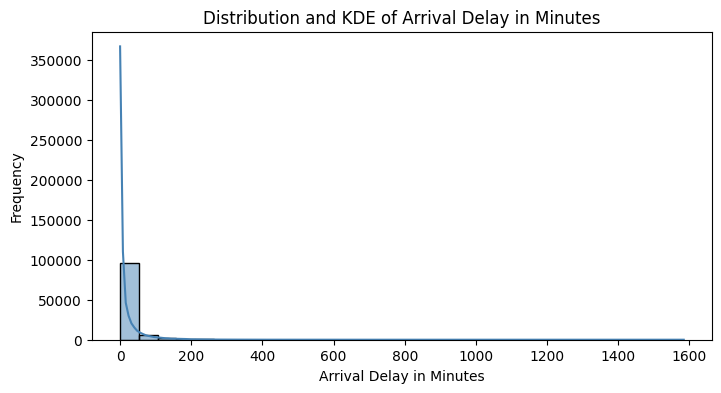

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


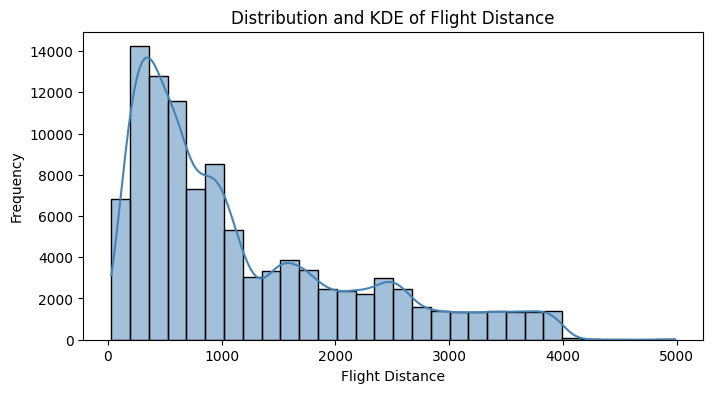

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


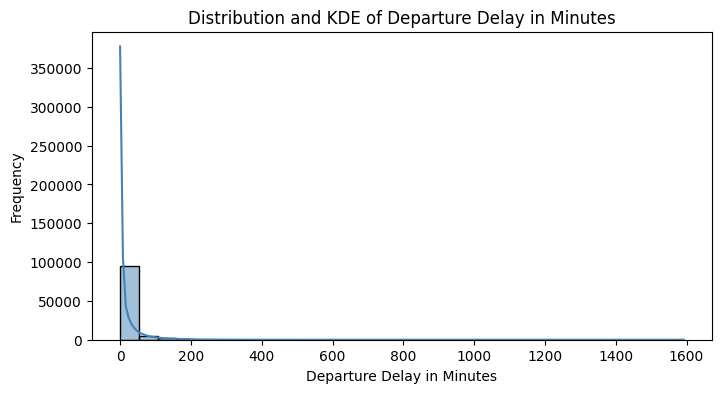

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


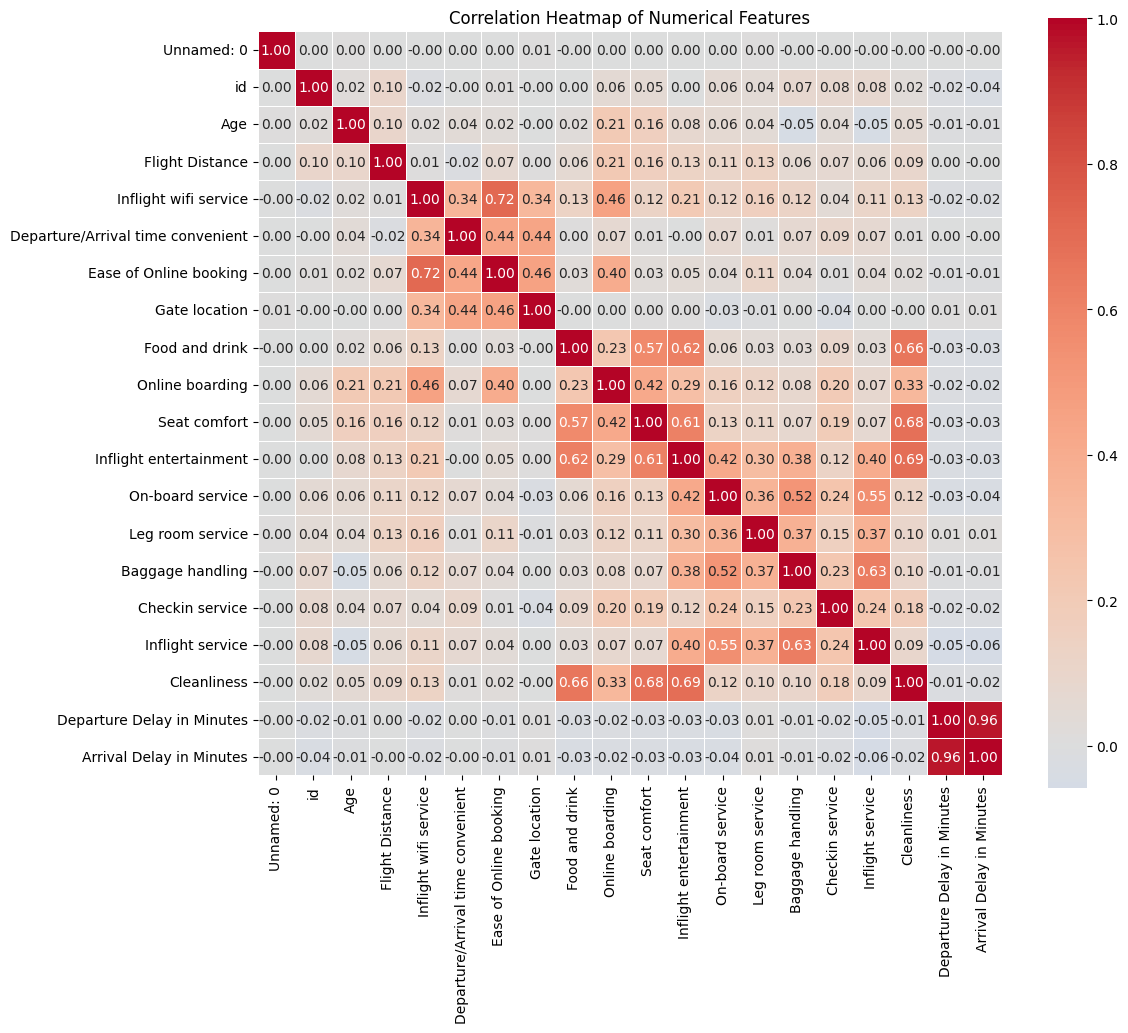

,Feature 1,Feature 2,Correlation
1,Arrival Delay in Minutes,Departure Delay in Minutes,0.960247
3,Ease of Online booking,Inflight wifi service,0.715856
4,Cleanliness,Inflight entertainment,0.691815
7,Cleanliness,Seat comfort,0.678534
9,Cleanliness,Food and drink,0.657760
11,Baggage handling,Inflight service,0.628561
12,Food and drink,Inflight entertainment,0.622512
14,Inflight entertainment,Seat comfort,0.610590
16,Food and drink,Seat comfort,0.574556
18,Inflight service,On-board service,0.550782


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_numeric = ['Arrival Delay in Minutes', 'Flight Distance', 'Departure Delay in Minutes']


# Histogram + KDE
for col in selected_numeric:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution and KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


# Heatmap

numeric_cols = df.select_dtypes(include=['number']).columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Find column pairs with correlation greater than 0.5
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr < 1) & (high_corr > 0.5)]

# Remove duplicate pairs (e.g. A-B and B-A)
high_corr = high_corr.reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr = high_corr[high_corr['Feature 1'] < high_corr['Feature 2']]  

high_corr.style.background_gradient(cmap='Blues').set_caption("Highly Correlated Feature Pairs (>|0.5|)")

## Visualizing Categorical Variables

In this section, we analyze the distribution of key **categorical variables** using two complementary visualizations:

- **Countplots:** Show the absolute frequency of each category.
- **Pie Charts:** Show the proportional breakdown (%) of each category.

The selected categorical variables are:

- `Gender`
- `Customer Type`
- `Class`
- `Satisfaction`

These features are important for understanding customer demographics, flight preferences, and overall satisfaction levels.


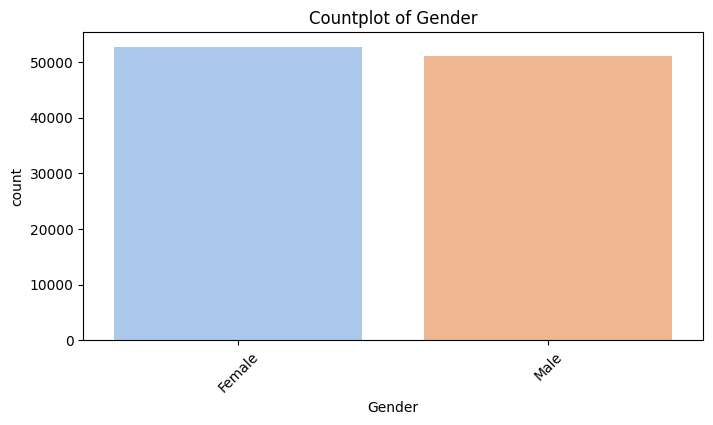

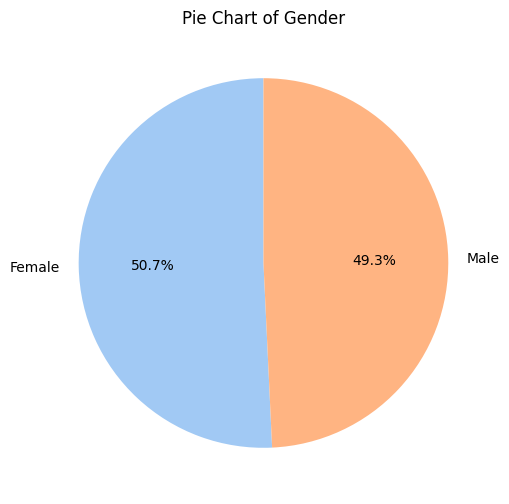

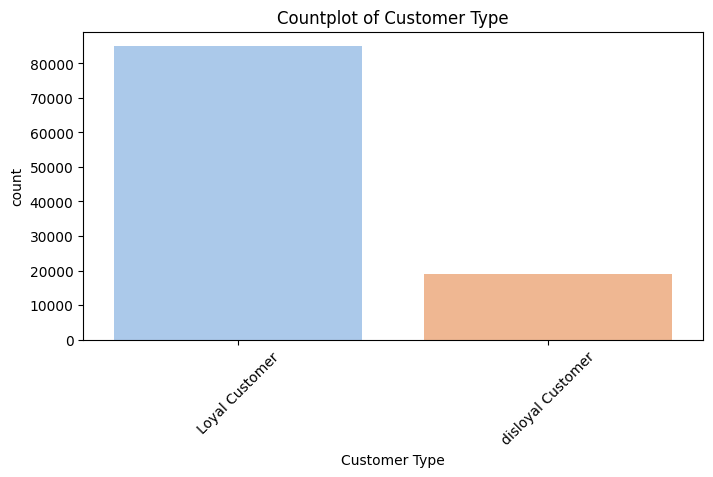

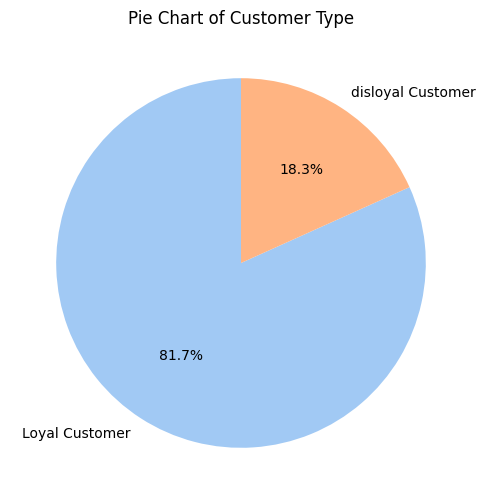

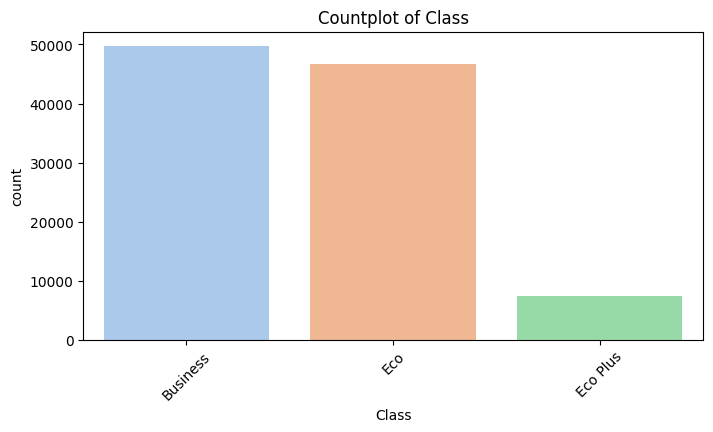

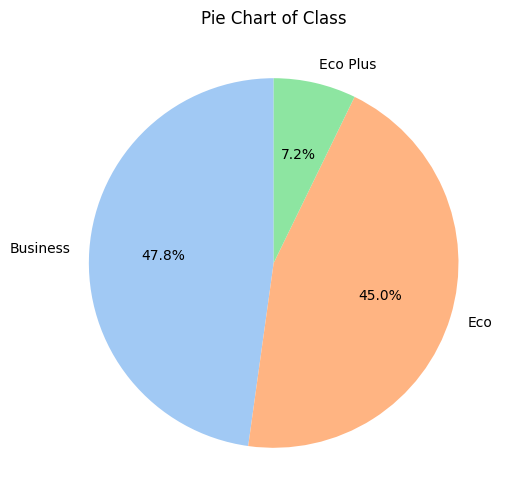

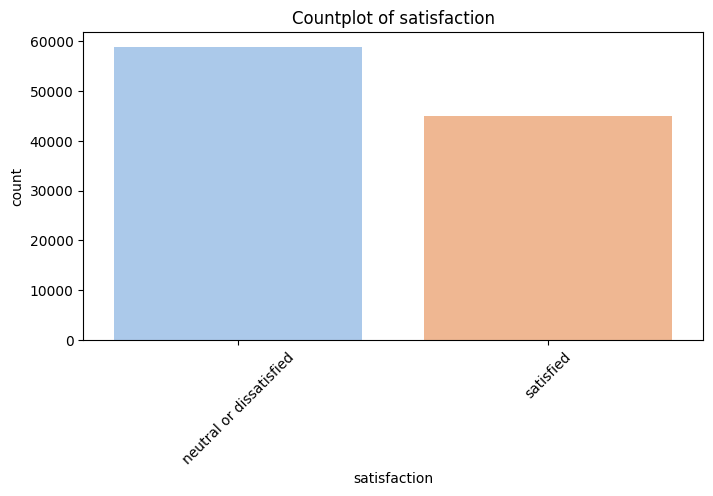

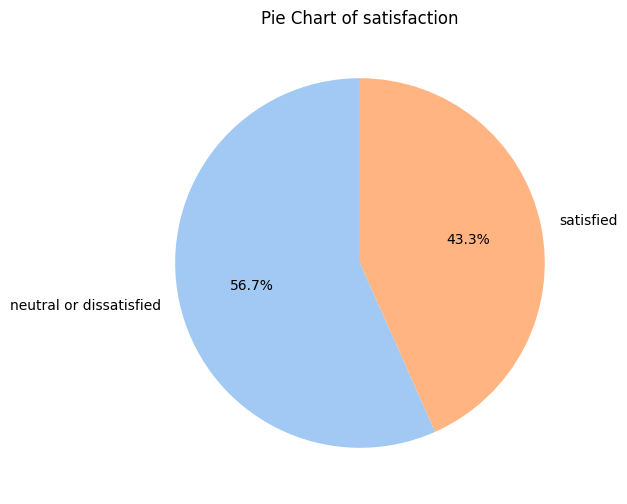

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_categorical = ['Gender', 'Customer Type', 'Class', 'satisfaction']

# Countplot
for col in selected_categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()
    
# Pie Chart
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    plt.ylabel('')
    plt.title(f"Pie Chart of {col}")
    plt.show()



## Conclusion and Summary Report

This notebook provided a comprehensive exploratory data analysis (EDA) on the **Airline Passenger Satisfaction** dataset. The aim was to understand the structure of the data, identify quality issues, and uncover patterns relevant to customer satisfaction.

---

### Key Steps and Observations

#### 1. **Descriptive Statistics**
- For all numerical variables, we calculated summary statistics such as **mean**, **median**, **standard deviation**, and quartiles.
- Including the **median** alongside the mean allowed us to compare central tendencies and detect **skewed distributions**, which is especially important in the presence of outliers.

#### 2. **Missing Value Analysis**
- Only one column, **`Arrival Delay in Minutes`**, had missing values (**310 rows**).
- We visualized the ratio of missing vs. filled data using a pie chart.
- Because the column showed skewed values and some high outliers, we chose to **impute missing values using the median**, which is more robust in such situations.
- Post-imputation validation confirmed that the distribution was preserved.

#### 3. **Outlier Detection**
- We applied the **Interquartile Range (IQR)** method to identify outliers in each numerical column.
- Features such as **`Arrival Delay in Minutes`**, **`Departure Delay in Minutes`**, and **`Flight Distance`** contained notable outliers.
- Outlier distributions were visualized using boxplots arranged in a grid layout, focusing only on columns with potential outliers.
- This step helped us understand which features might require transformation or clipping before modeling.

#### 4. **Categorical Variable Visualization**
- We selected four key categorical variables: `Gender`, `Customer Type`, `Class`, and `Satisfaction`.
- For each, we used **countplots** to show the frequency distribution and **pie charts** to display proportion.
- Observations:
  - **Gender** was relatively balanced.
  - **Customer Type** and **Class** showed more variation, which may influence satisfaction.
  - **Satisfaction** distribution revealed potential class imbalance — an important factor for predictive modeling.

#### 5. **Correlation Analysis**
- A correlation matrix heatmap was used to analyze relationships between numerical features.
- We found strong positive correlations between several variable pairs:
  - `Arrival Delay` & `Departure Delay`: 0.96
  - `Inflight Entertainment`, `Seat Comfort`, `Food and Drink`: >0.60
- These findings indicate potential **feature redundancy** and **multicollinearity**, which are important to address during model development.

---

### Summary of Findings

- The dataset is well-structured, with minimal missing data.
- Some features show significant skewness and outliers.
- Categorical features are well-distributed, with some imbalance in the satisfaction label.
- Strong correlations between service-related features suggest the presence of **latent dimensions of service quality**, which could be useful in dimensionality reduction.
- Median imputation and targeted outlier handling helped ensure data quality for future modeling steps.

---

This analysis laid a solid foundation for building robust predictive models and understanding the core factors affecting airline passenger satisfaction.
